In [1]:
from MobileAgentE import *
from inference_agent_E import Perceptor, DEFAULT_PERCEPTION_ARGS
ADB_PATH = "/Users/wangz3/Desktop/vlm_agent_project/platform-tools/adb"
perceptor = Perceptor(adb_path=ADB_PATH, perception_args = DEFAULT_PERCEPTION_ARGS)


2024-12-15 10:59:03,725 - modelscope - INFO - Use user-specified model revision: v1.0.0
2024-12-15 10:59:04,781 - modelscope - WARNING - ('PIPELINES', 'grounding-dino-task', 'Groundingdino-generation-pipe') not found in ast index file


final text_encoder_type: /Users/wangz3/.cache/modelscope/hub/AI-ModelScope/GroundingDINO/bert-base-uncased


2024-12-15 10:59:06,492 - modelscope - WARNING - No preprocessor field found in cfg.
2024-12-15 10:59:06,493 - modelscope - WARNING - No val key and type key found in preprocessor domain of configuration.json file.
2024-12-15 10:59:06,494 - modelscope - WARNING - Cannot find available config to build preprocessor at mode inference, current config: {'model_dir': '/Users/wangz3/.cache/modelscope/hub/AI-ModelScope/GroundingDINO'}. trying to build by task and model information.
2024-12-15 10:59:06,494 - modelscope - WARNING - No preprocessor key ('Groundingdino', 'grounding-dino-task') found in PREPROCESSOR_MAP, skip building preprocessor.
2024-12-15 10:59:06,497 - modelscope - INFO - cuda is not available, using cpu instead.


2024-12-15 10:59:08,561 - modelscope - WARNING - Model revision not specified, use revision: v1.3.0
2024-12-15 10:59:09,048 - modelscope - INFO - initiate model from /Users/wangz3/.cache/modelscope/hub/iic/cv_resnet18_ocr-detection-db-line-level_damo
2024-12-15 10:59:09,049 - modelscope - INFO - initiate model from location /Users/wangz3/.cache/modelscope/hub/iic/cv_resnet18_ocr-detection-db-line-level_damo.
2024-12-15 10:59:09,052 - modelscope - INFO - initialize model from /Users/wangz3/.cache/modelscope/hub/iic/cv_resnet18_ocr-detection-db-line-level_damo
2024-12-15 10:59:09,233 - modelscope - INFO - cuda is not available, using cpu instead.
2024-12-15 10:59:09,234 - modelscope - INFO - loading model from dir /Users/wangz3/.cache/modelscope/hub/iic/cv_resnet18_ocr-detection-db-line-level_damo
2024-12-15 10:59:09,237 - modelscope - INFO - loading model done


2024-12-15 10:59:11,539 - modelscope - WARNING - Model revision not specified, use revision: v2.4.0
2024-12-15 10:59:12,169 - modelscope - INFO - initiate model from /Users/wangz3/.cache/modelscope/hub/iic/cv_convnextTiny_ocr-recognition-document_damo
2024-12-15 10:59:12,169 - modelscope - INFO - initiate model from location /Users/wangz3/.cache/modelscope/hub/iic/cv_convnextTiny_ocr-recognition-document_damo.
2024-12-15 10:59:12,171 - modelscope - INFO - initialize model from /Users/wangz3/.cache/modelscope/hub/iic/cv_convnextTiny_ocr-recognition-document_damo
2024-12-15 10:59:12,288 - modelscope - INFO - cuda is not available, using cpu instead.
2024-12-15 10:59:12,289 - modelscope - INFO - loading model from dir /Users/wangz3/.cache/modelscope/hub/iic/cv_convnextTiny_ocr-recognition-document_damo
2024-12-15 10:59:12,292 - modelscope - INFO - loading model done


INFO: Loaded perception models:
	- Caption model method: api | caption vlm model: qwen-vl-plus
	- Grounding DINO model: <GroundingDINO.ms_wrapper.GroundingdinoGenerationPipeline object at 0x103ac50f0>
	- OCR detection model: iic/cv_resnet18_ocr-detection-db-line-level_damo
	- OCR recognition model: iic/cv_convnextTiny_ocr-recognition-document_damo


[[919, 667, 1035, 777], [942, 268, 1036, 362], [41, 130, 95, 186], [48, 2122, 99, 2173], [848, 130, 904, 185], [95, 473, 526, 616], [96, 474, 202, 586], [518, 2243, 565, 2290], [322, 841, 364, 884], [710, 131, 761, 183], [357, 511, 426, 616], [901, 23, 947, 62], [901, 21, 1023, 64], [133, 98, 666, 215], [47, 294, 106, 335], [553, 481, 985, 591], [124, 2132, 172, 2165], [202, 24, 238, 62], [155, 26, 189, 61], [457, 512, 524, 586], [548, 842, 590, 884], [830, 2243, 863, 2292], [38, 665, 1038, 779], [993, 25, 1022, 61], [55, 21, 239, 65]]


SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


<Figure size 2000x1000 with 0 Axes>

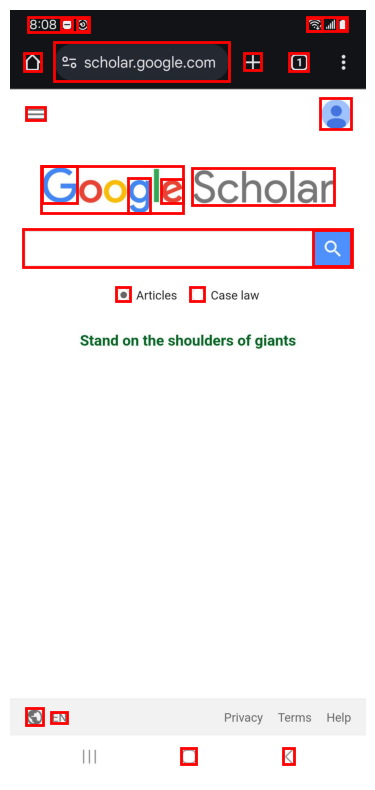

In [10]:
import torch
from MobileAgentE.icon_localization import remove_boxes
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_bounding_boxes(image_path, bounding_boxes):
    """
    Visualizes bounding boxes on the image.
    
    Args:
        image_path (str): Path to the input image.
        bounding_boxes (list): List of bounding boxes, where each box is [x_min, y_min, x_max, y_max].
    """
    # Load the image
    image = Image.open(image_path)
    
    # Create a figure and axis
    plt.figure(figsize=(20, 10))
    fig, ax = plt.subplots(1, figsize=(20, 10))
    
    # Show the image
    ax.imshow(image)
    
    # Add bounding boxes to the image
    for box in bounding_boxes:
        x_min, y_min, x_max, y_max = box
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
    
    # Display the image
    plt.axis('off')
    plt.show()

def det(input_image_path, caption, groundingdino_model, box_threshold=0.05, text_threshold=0.5):
    image = Image.open(input_image_path)
    size = image.size

    caption = caption.lower()
    caption = caption.strip()
    if not caption.endswith('.'):
        caption = caption + '.'
    
    inputs = {
        'IMAGE_PATH': input_image_path,
        'TEXT_PROMPT': caption,
        'BOX_TRESHOLD': box_threshold,
        'TEXT_TRESHOLD': text_threshold
    }

    result = groundingdino_model(inputs)
    boxes_filt = result['boxes']

    H, W = size[1], size[0]
    for i in range(boxes_filt.size(0)):
        boxes_filt[i] = boxes_filt[i] * torch.Tensor([W, H, W, H])
        boxes_filt[i][:2] -= boxes_filt[i][2:] / 2
        boxes_filt[i][2:] += boxes_filt[i][:2]

    boxes_filt = boxes_filt.cpu().int().tolist()
    filtered_boxes = remove_boxes(boxes_filt, size)  # [:9]
    coordinates = []
    for box in filtered_boxes:
        coordinates.append([box[0], box[1], box[2], box[3]])

    return coordinates

input_image_path = "/Users/wangz3/Desktop/vlm_agent_project/MobileAgent/Mobile-Agent-v2/logs/agent_E/scenario_2_batch_v1.json-curriculum/2_segment_anything_cited/screenshots/7.jpg"

coordinates = det(input_image_path, "icon", perceptor.groundingdino_model)
print(coordinates)
visualize_bounding_boxes(input_image_path, coordinates)